Business Questions
Interested to be able to address the following questions using the "IBM Employee Attrition" dataset.

Descriptive Analytics: Why do people quit? Which workers are at high risk of leaving? What are the drivers and reasons for employees to quit their job? What are early warning signals that employees are considering to leave their company? What are typical behaviors that employees exhibit when they are considering to leave their company? What early intervention can be made to reduce attrition?

Predictive Analytics: Can we predict attrition? Can I predict who would stay and/or leave in the next six months?

Which employees are more likely to be looking for opportunities outside their company? Which company/companies employees are planning to go for an interview next? What is the liklihood of keeping employees after intervention?

# 1| import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 | Data preparation

In [5]:
df_IBM = pd.read_csv("IBM Employee.csv")

df_IBM

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


In [6]:
#Find the number of rows and columns
print(f"What are the total number of rows and columns?\n{df_IBM.shape}")

print(f"The number of rows = {df_IBM.shape[0]} rows and the number of columns = {df_IBM.shape[1]} columns")

What are the total number of rows and columns?
(1058, 35)
The number of rows = 1058 rows and the number of columns = 35 columns


# 3 | Check the missing data (data cleaning)

In [7]:
print(f"Are there any null / missing values?\n{df_IBM.isnull().any()}")

Are there any null / missing values?
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkin

In [8]:
#display only the attributes that have missing values
df_IBM.isnull().any().describe()

count        35
unique        1
top       False
freq         35
dtype: object

In [9]:
print(f"The count of the total number of null values by attribute :\n {df_IBM.isnull().sum()}")


The count of the total number of null values by attribute :
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCo

In [10]:
#check for any duplicates
df_IBM.duplicated().sum()

0

# therefore there is no missing values of duplicates

# 2 | Exploratory Data Analysis (EDA)

# Summary statistics

In [11]:
df_IBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
df_IBM.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2
1057,29,1,Travel_Frequently,115,Sales,13,3,Technical Degree,1,1487,...,1,80,0,7,4,1,5,3,0,0


In [14]:
df_IBM.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
599,36,0,Travel_Rarely,1041,Human Resources,13,3,Human Resources,1,829,...,2,80,1,8,2,3,5,2,0,4


In [15]:
df_IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [16]:
df_IBM.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    731
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1058
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                991
MonthlyRate                 1038
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Key | Observation:
* The following attributes have 4 distinct / unique values. They might represent likeart scales:

1) Environment Satisfaction 
2) Job Satisfaction 
3) Relationship Satisfaction 
4) Work Life Balance

In [18]:
#include all columns
df_IBM.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.0,1058.000000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,1.0,731.753308,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,0.0,431.418209,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,1.0,364.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,1.0,723.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,1.0,1101.750000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


In [19]:
#include number columns
df_IBM.describe(include="number")

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [20]:
#exclude number columns
df_IBM.describe(exclude="number")

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,746,701,436,620,232,464,1058,751


# 3| Data visualization and More analysis

# Bar Graph
Second, examined attributes related to demographics of employees using Bar Graph

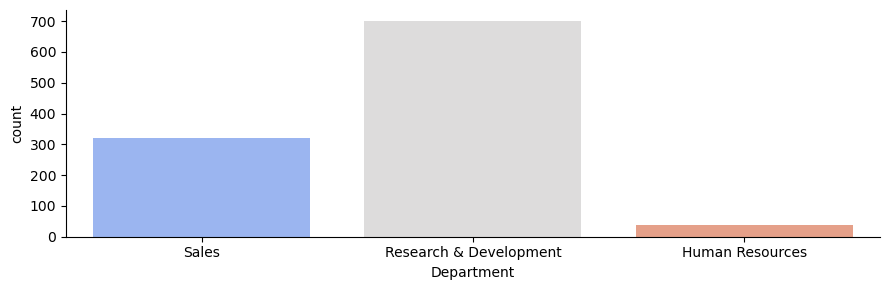

In [22]:
# data = df_train.sort_values(by = 'count', ascending = False)
sns.catplot(data = df_IBM, kind = 'count', aspect = 3, height = 3, x = 'Department', palette = "coolwarm")

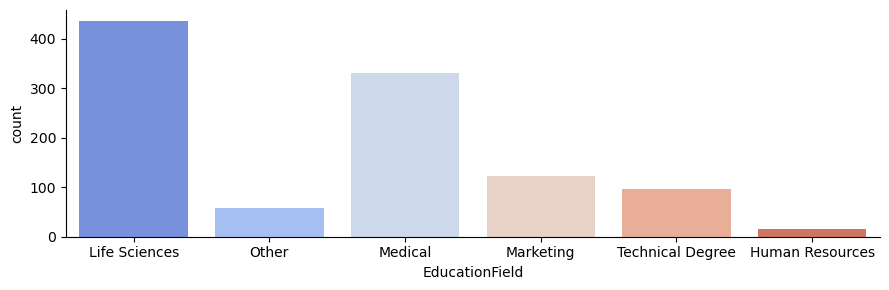

In [25]:
# data = df_train.sort_values(by = 'count', ascending = False)
sns.catplot(data = df_IBM, kind = 'count', aspect = 3, height = 3, x = 'EducationField', palette = "coolwarm")

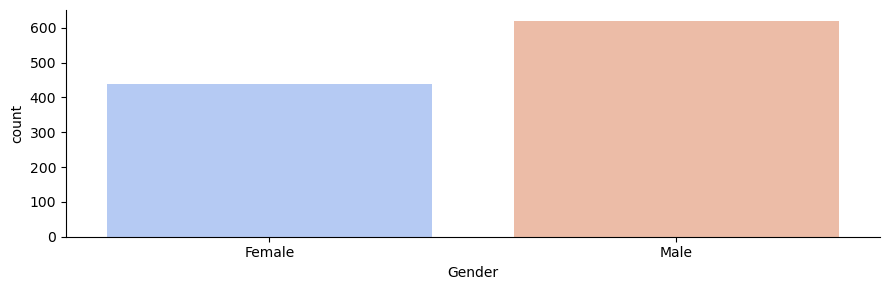

In [26]:
sns.catplot(data=df_IBM,kind="count",aspect=3,height=3,x="Gender",palette="coolwarm")

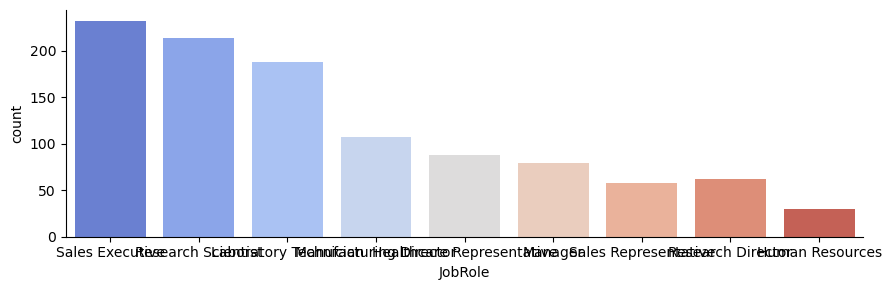

In [29]:
sns.catplot(data=df_IBM,kind="count",aspect=3,height=3,x="JobRole",palette="coolwarm")

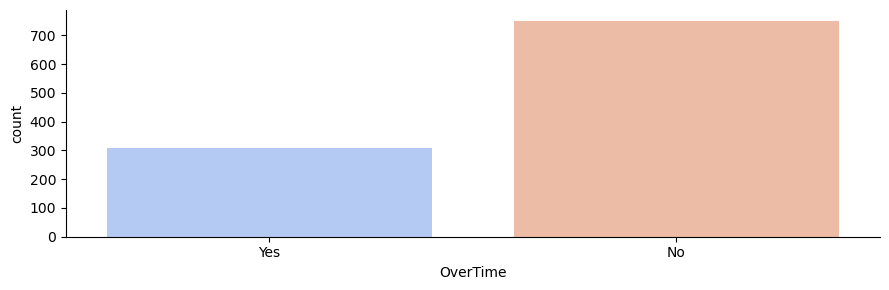

In [30]:
sns.catplot(data=df_IBM,kind="count",aspect=3,height=3,x="OverTime",palette="coolwarm")

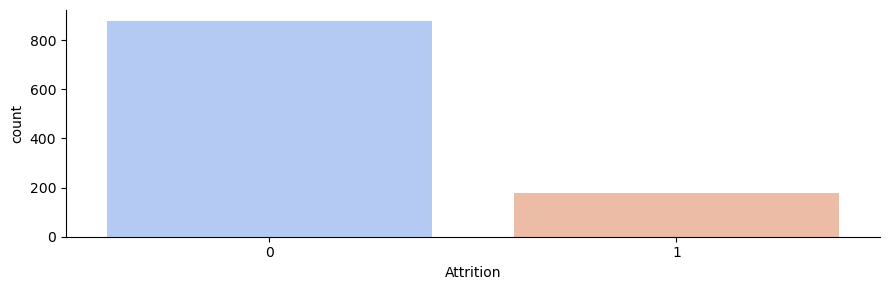

In [34]:
sns.catplot(data = df_IBM, kind = 'count', aspect = 3, height = 3, x = 'Attrition', palette = "coolwarm");

C:\Users\kirol\AppData\Local\Temp\ipykernel_35700\4239664447.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_IBM.corr(),annot=True)


<Axes: >

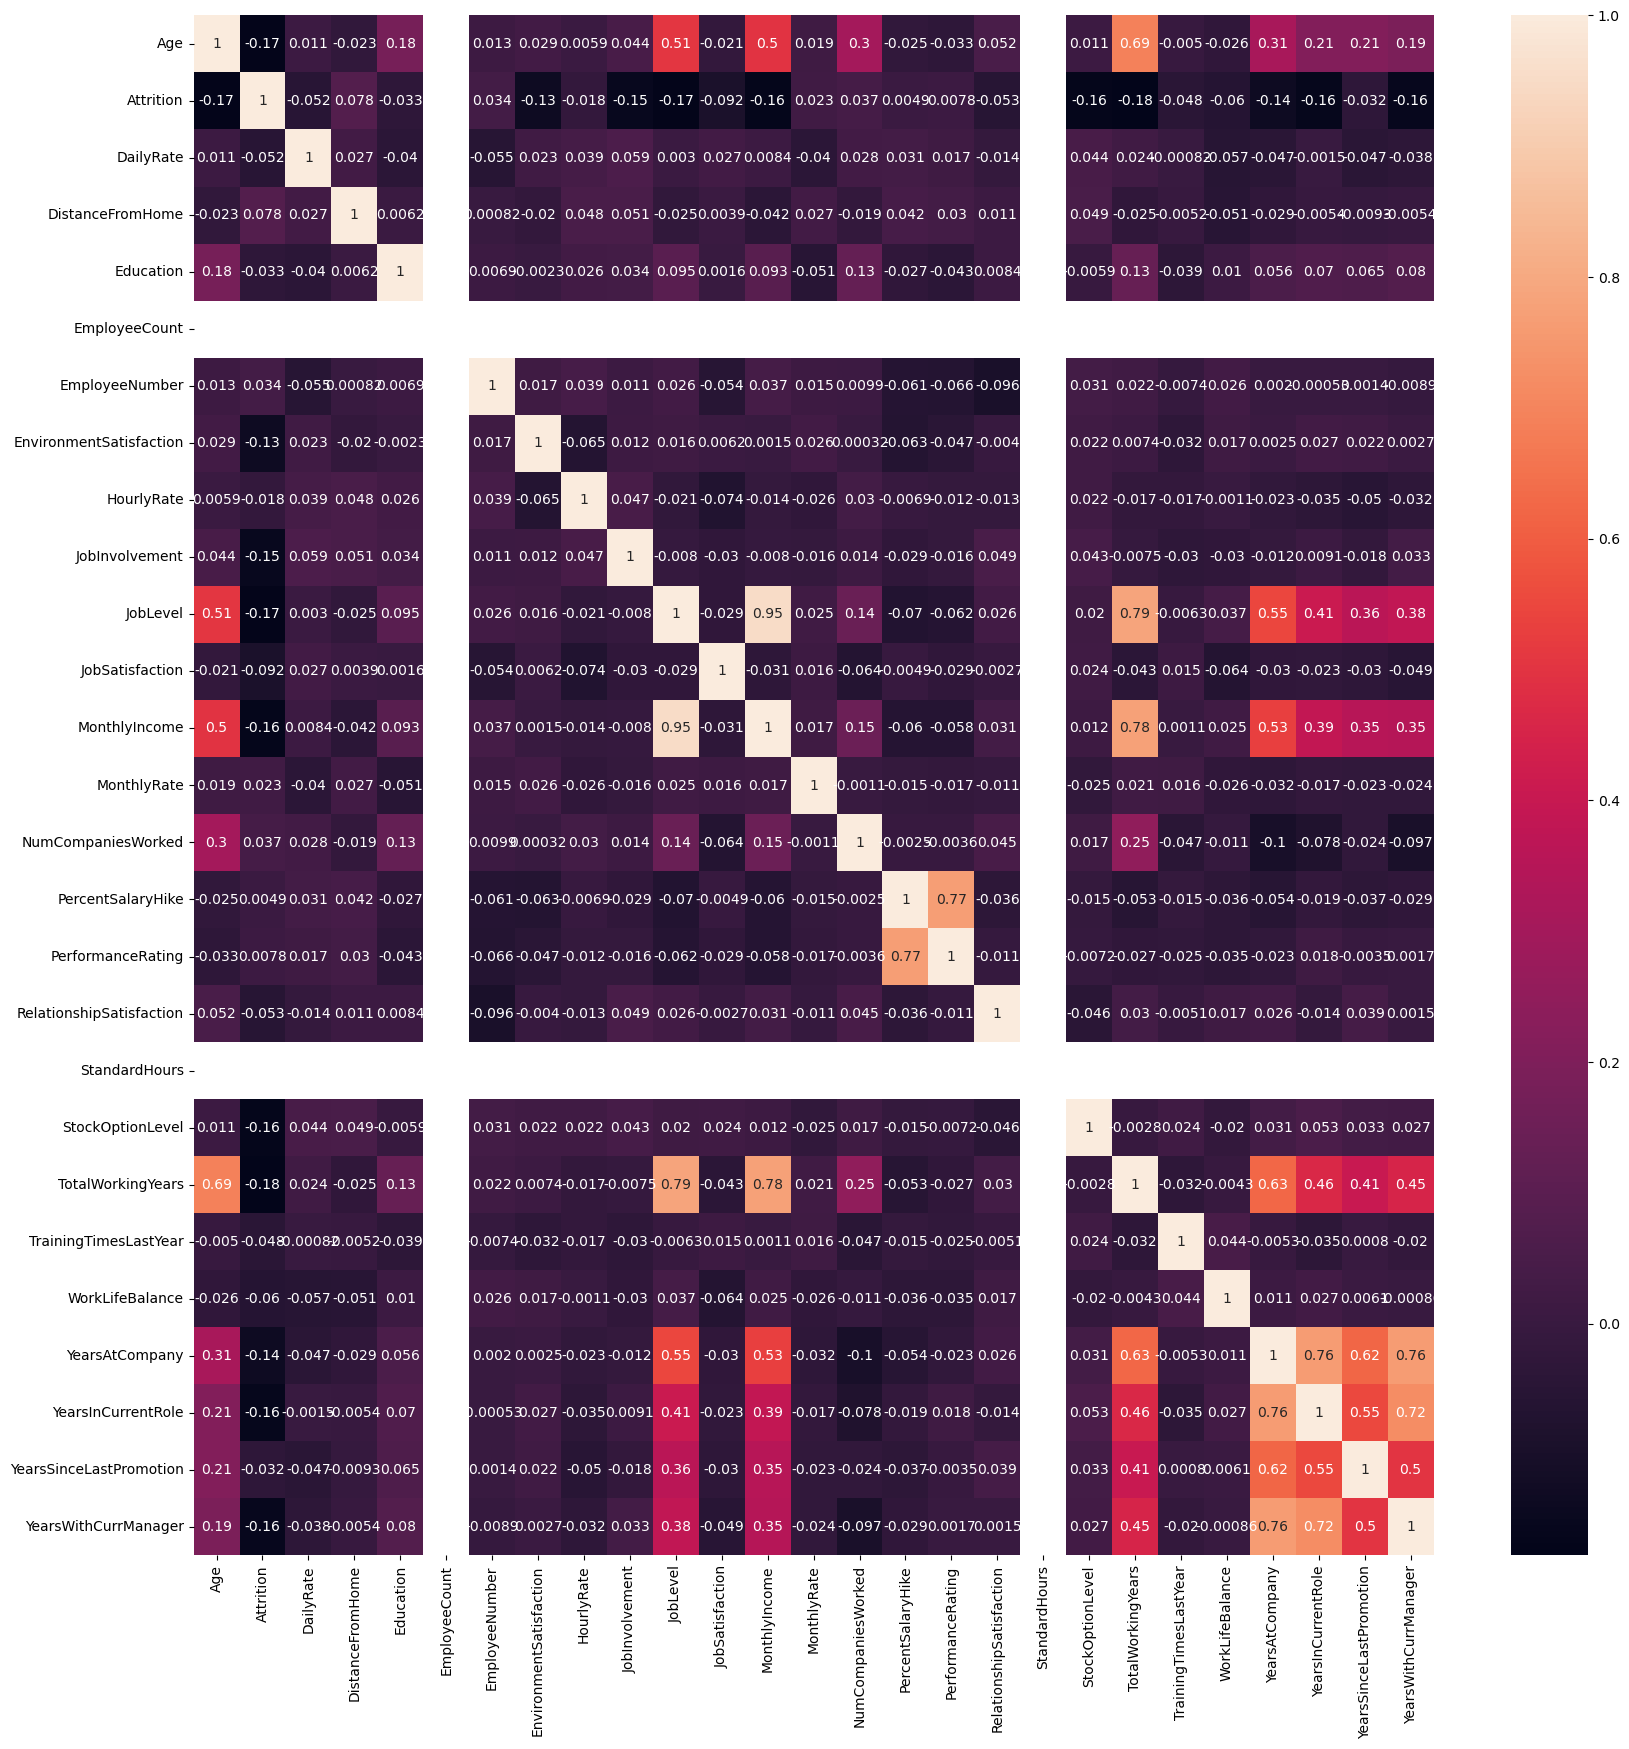

In [35]:
plt.figure(figsize=(20,20))

sns.heatmap(df_IBM.corr(),annot=True)

# Positive correlation (0.95) between "monthly income" and "job level"

# Positive correlation (0.79) between "total working years" and "job level"

# Positive correlation (0.78) between "total working years" and "monthly income

# Boxplot & Histogram

In [36]:
num_col = df_IBM.select_dtypes(include=["float64","int64"]).sum()
num_col

Age                            39205
Attrition                        179
DailyRate                     856496
DistanceFromHome                9499
Education                       3046
EmployeeCount                   1058
EmployeeNumber                774195
EnvironmentSatisfaction         2870
HourlyRate                     69451
JobInvolvement                  2896
JobLevel                        2212
JobSatisfaction                 2909
MonthlyIncome                7010250
MonthlyRate                 15094784
NumCompaniesWorked              2864
PercentSalaryHike              16035
PerformanceRating               3333
RelationshipSatisfaction        2885
StandardHours                  84640
StockOptionLevel                 807
TotalWorkingYears              12099
TrainingTimesLastYear           2930
WorkLifeBalance                 2924
YearsAtCompany                  7475
YearsInCurrentRole              4508
YearsSinceLastPromotion         2331
YearsWithCurrManager            4383
d

In [37]:
continuous = ['Age', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears']

print("created a series with continuous attributes")

created a series with continuous attributes


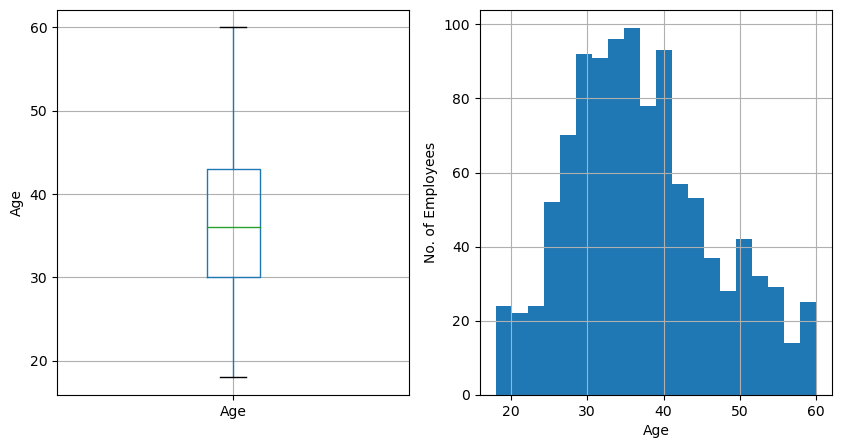

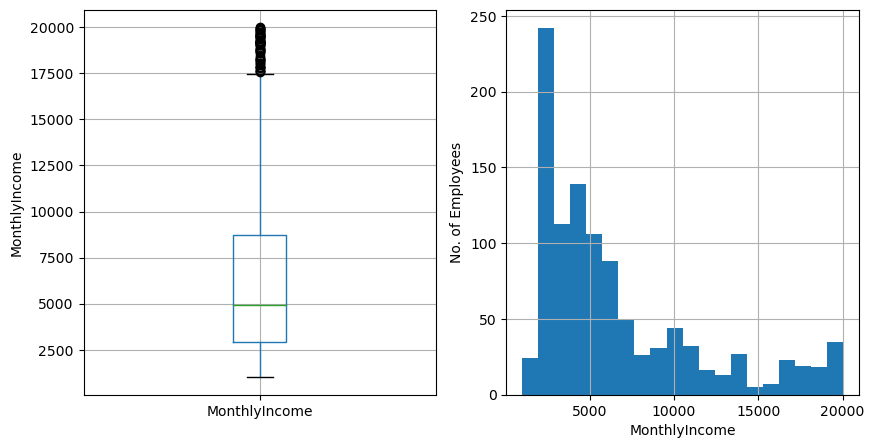

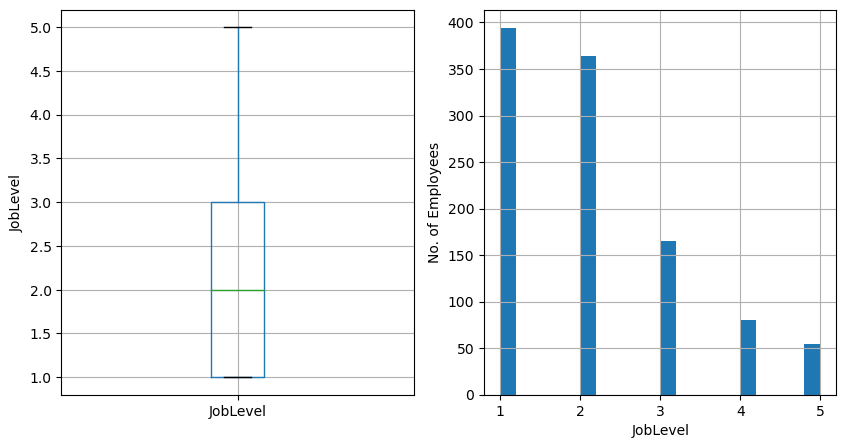

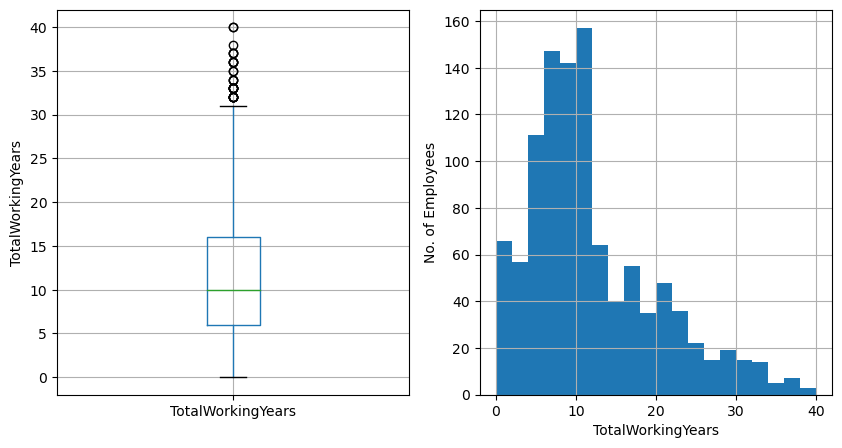

In [38]:
#Age attribute and other attributes that are correlated among each other
for x in continuous:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = df_IBM.boxplot(column = x)
    fig.set_ylabel(x)
    
    #histogram
    plt.subplot(1,2,2)
    fig = df_IBM[x].hist(bins = 20)
    fig.set_ylabel('No. of Employees')
    fig.set_xlabel(x)
    
    plt.show()

# Predict the Attrition of an employee based on the various factor given

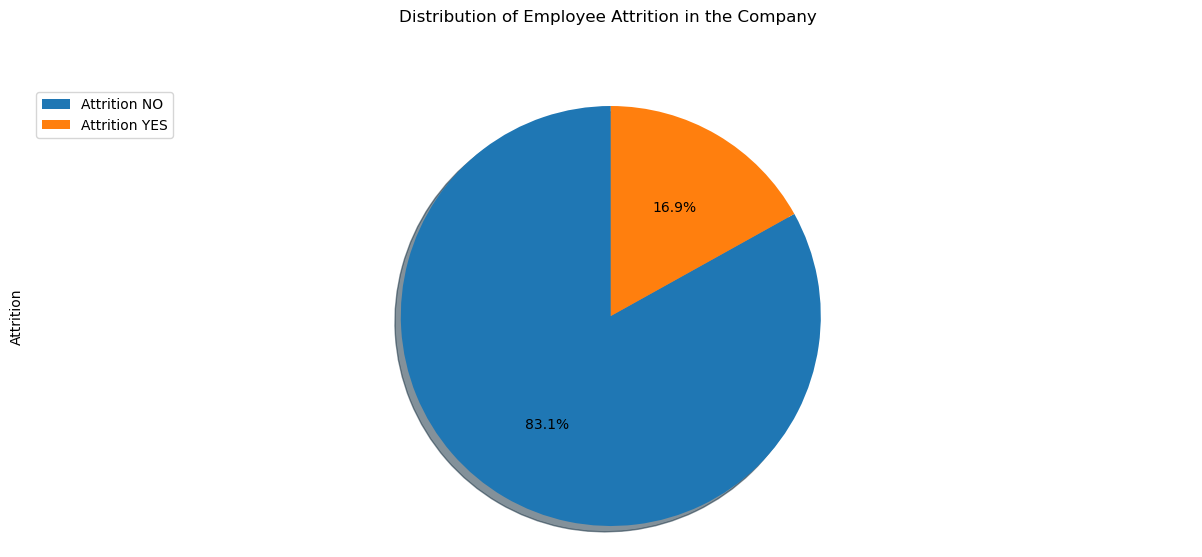

In [39]:
labels = 'Attrition NO','Attrition YES'
df_IBM['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

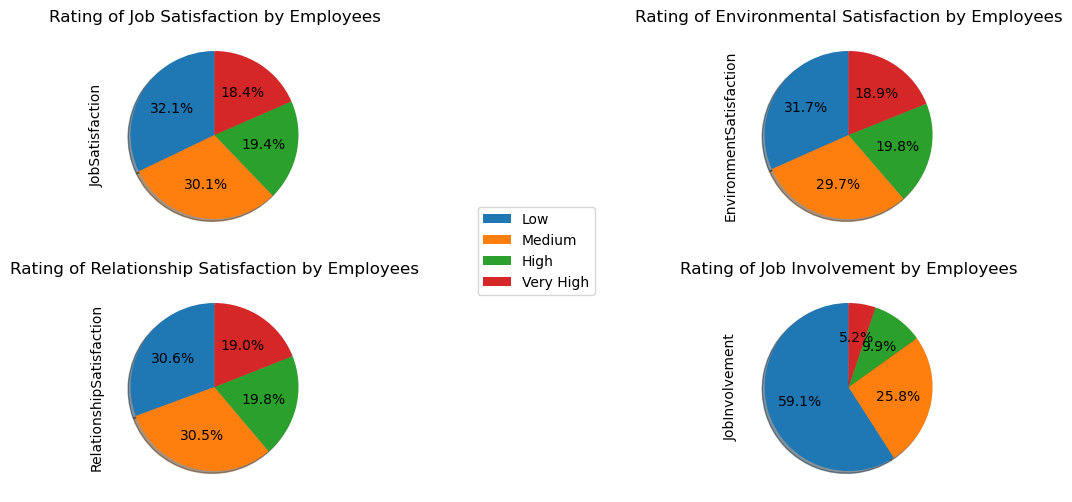

In [40]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels = "Low" ,"Medium" , "High" , "Very High"

df_IBM["JobSatisfaction"].astype(str).value_counts().plot(kind="pie",
                                                         
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df_IBM['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df_IBM['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)

ax3.set_title('Rating of Relationship Satisfaction by Employees')

df_IBM['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

From the subplot, we can infer that more than 60% of the employees are :
Not Satisfied in their Job
Not Satisfied with their Work Environmnet
Not Satisfied in their Relationship
Not Getting involved in their job

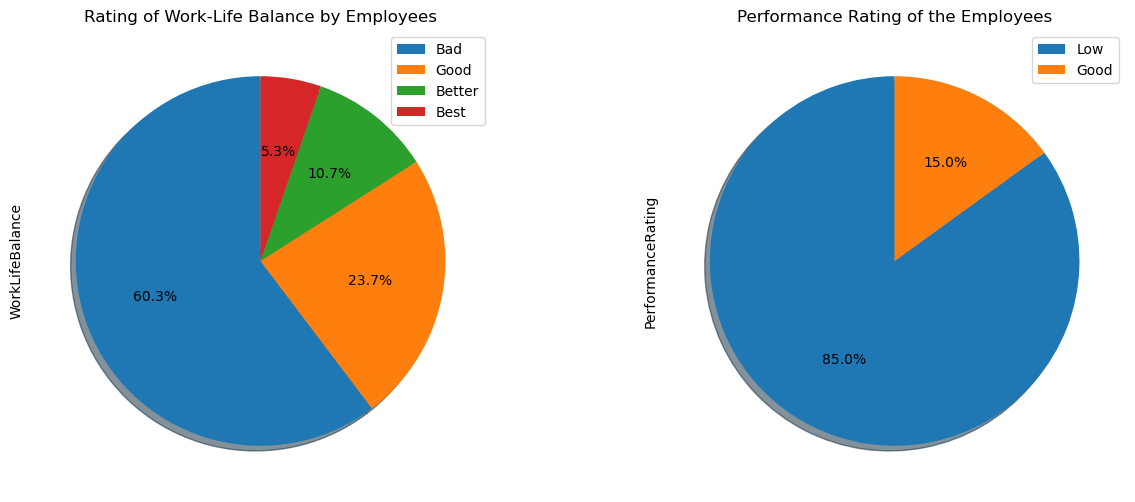

In [41]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'


df_IBM['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # 
#add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

df_IBM['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

## From the above piecharts, we can see that:
Almost 60% of the employees have rated their Work-life Balance as Bad Almost 85% of the employees have a low performance rating

# Analysis of Busniess Travel Feature

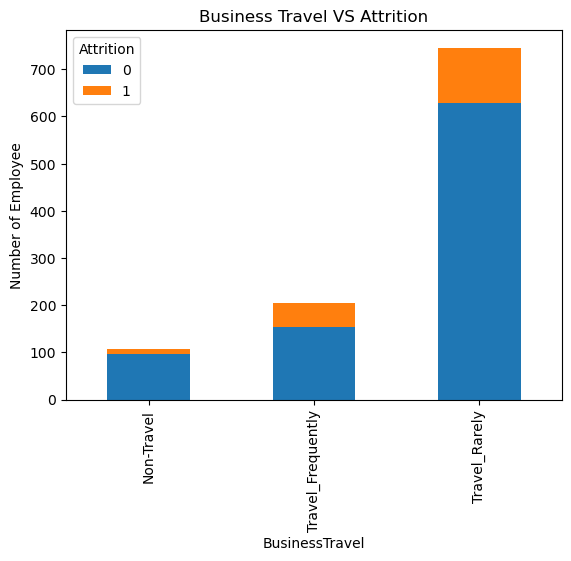

In [42]:
props = df_IBM.groupby("BusinessTravel")["Attrition"].value_counts(normalize=False).unstack()

props.plot(kind="bar",alpha=1 ,stacked="False")

plt.title("Business Travel VS Attrition")
plt.ylabel("Number of Employee")
plt.show()

# From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently

## Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interest

## Analysis of Work Experience
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager
* TotalWorkingYears

In [43]:
we = df_IBM[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()


,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,1
1,10,7,1,7,10,0
2,0,0,0,0,7,1
3,8,7,3,0,8,0
4,2,2,2,2,6,0


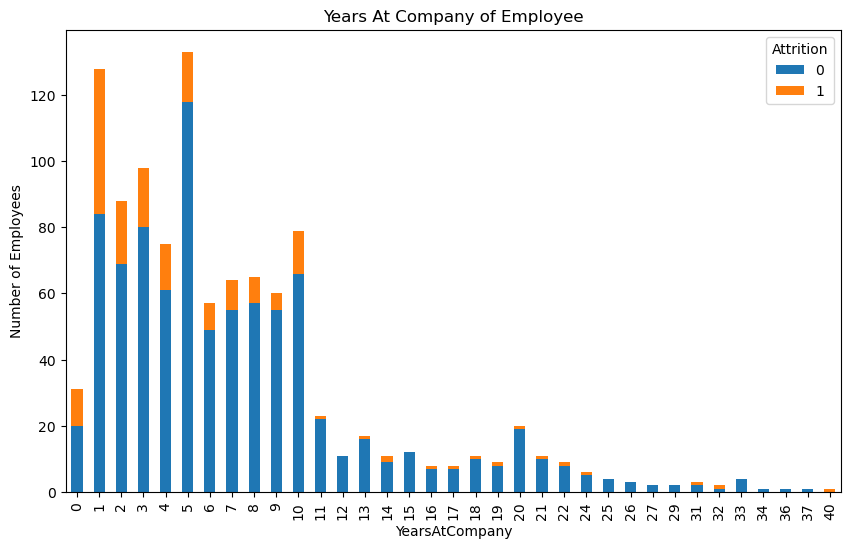

In [44]:
yac = df_IBM.groupby("YearsAtCompany")["Attrition"].value_counts(normalize=False).unstack()

yac.plot(kind="bar",stacked="False",figsize=(10,6))
plt.title("Years At Company of Employee")
plt.ylabel("Number of Employees")
plt.show()

It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out

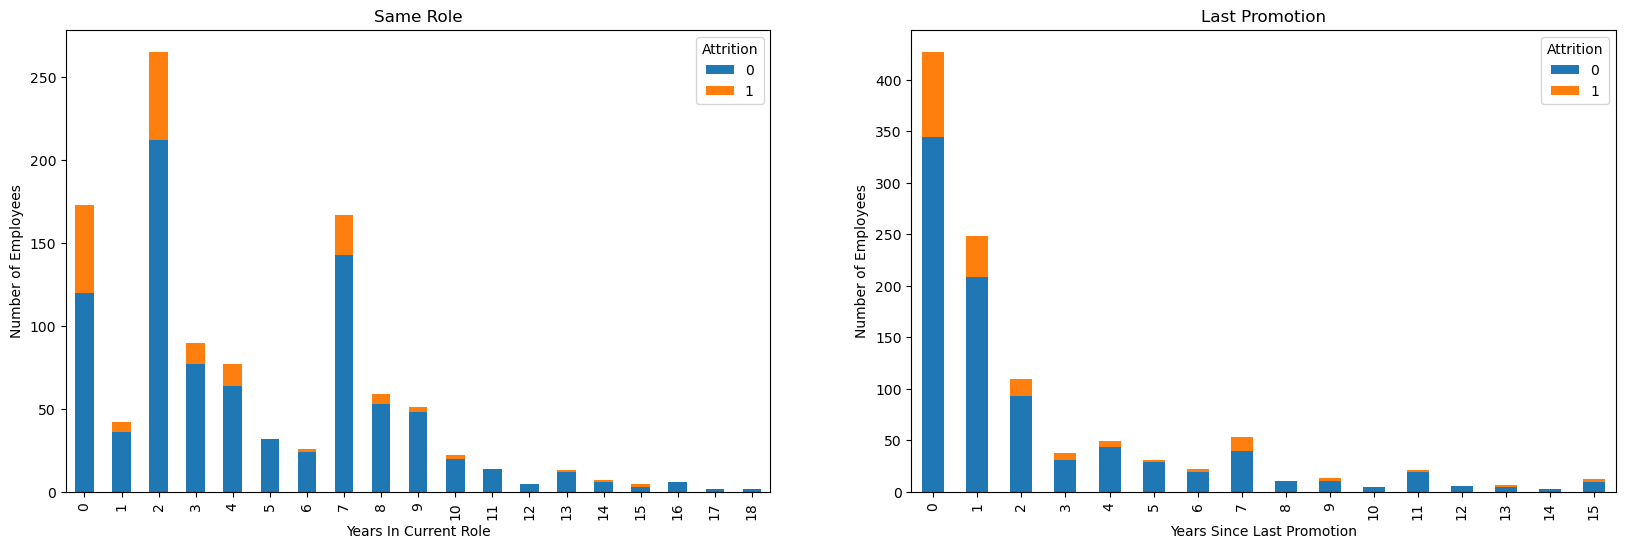

In [45]:
ycr = df_IBM.groupby("YearsInCurrentRole")["Attrition"].value_counts(normalize=False).unstack()
ysp = df_IBM.groupby("YearsSinceLastPromotion")["Attrition"].value_counts(normalize=False).unstack()

fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company most

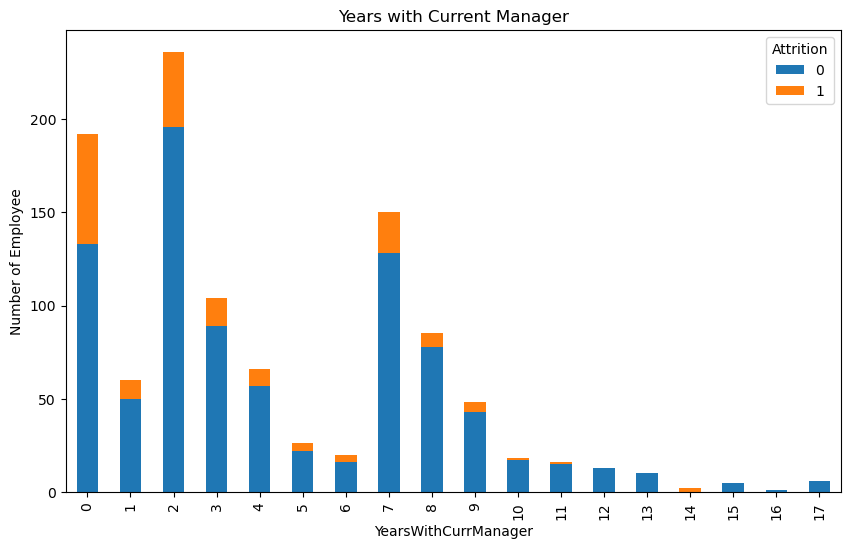

In [46]:
ycm = df_IBM.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

It is clear that in the starting of relation of Manager and Employee's are not so happy. It is important that the Manager communication with the employee from the starting itself trying to understand them soon to reduce the increase in Attrition

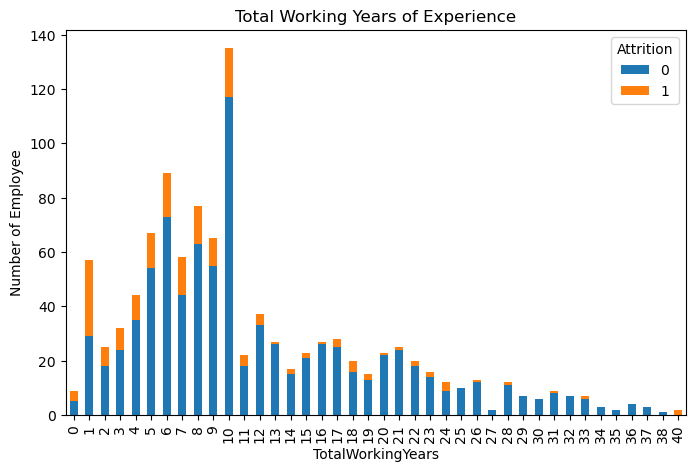

In [47]:
twy = df_IBM.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start

# Analysis on Department

In [48]:
dpt = df_IBM[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,1
1,Research & Development,0
2,Research & Development,1
3,Research & Development,0
4,Research & Development,0


In [49]:
dpt["Department"].value_counts()

Research & Development    701
Sales                     319
Human Resources            38
Name: Department, dtype: int64

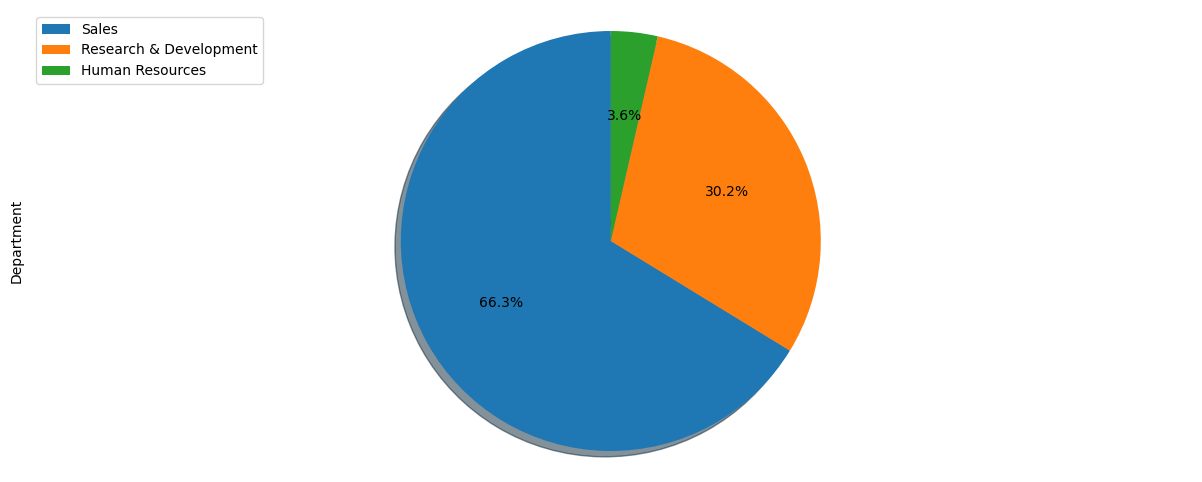

In [50]:
dpt["Department"].value_counts().plot(kind="pie",figsize=(15,6),autopct="%1.1f%%",startangle=90,shadow=True,labels=None)

plt.axis("equal")
plt.legend(labels=dpt["Department"].unique(),loc="upper left")

In [51]:
dpm = df_IBM.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,32,594,253
1,6,107,66


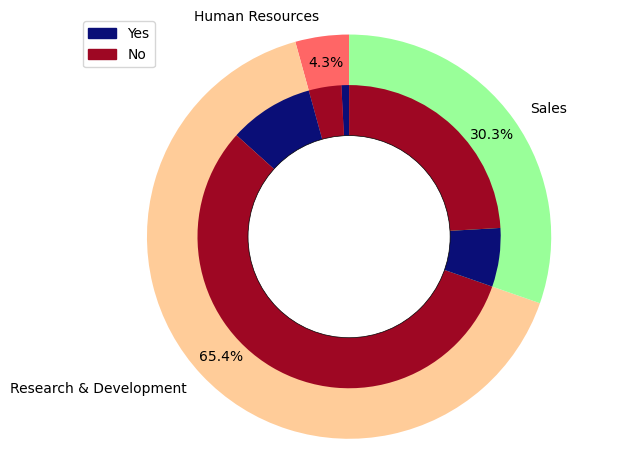

In [52]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']

# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.tight_layout()

plt.show()

# Analysis Gender

In [54]:
gda = df_IBM[["Gender","DistanceFromHome","Attrition"]]

gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,1
1,Male,8,0
2,Male,2,1
3,Female,3,0
4,Male,2,0


In [55]:
gda["Gender"].value_counts()

Male      620
Female    438
Name: Gender, dtype: int64

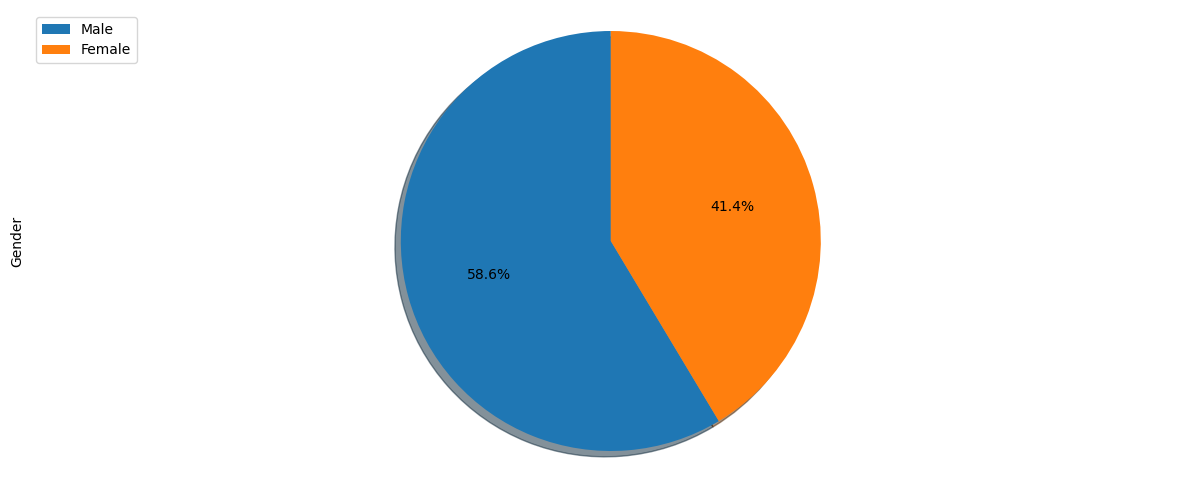

In [56]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper left') 

In [57]:
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
0,367,512
1,71,108


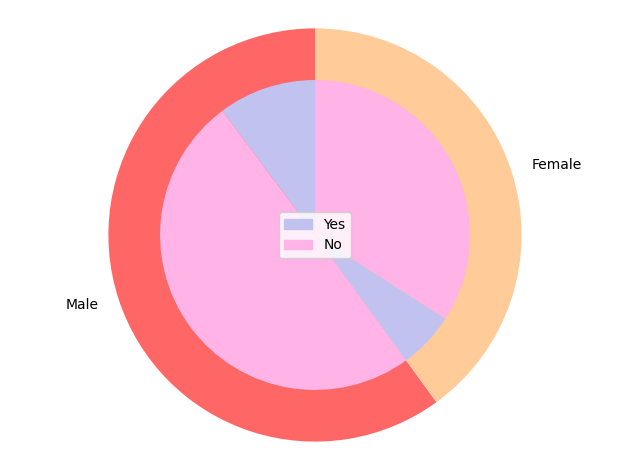

In [58]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)

pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()


# Analysis of Marital Status

In [59]:
ms = df_IBM[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,1
1,Married,0
2,Single,1
3,Married,0
4,Married,0


In [60]:
ms['MaritalStatus'].value_counts()

Married     464
Single      352
Divorced    242
Name: MaritalStatus, dtype: int64

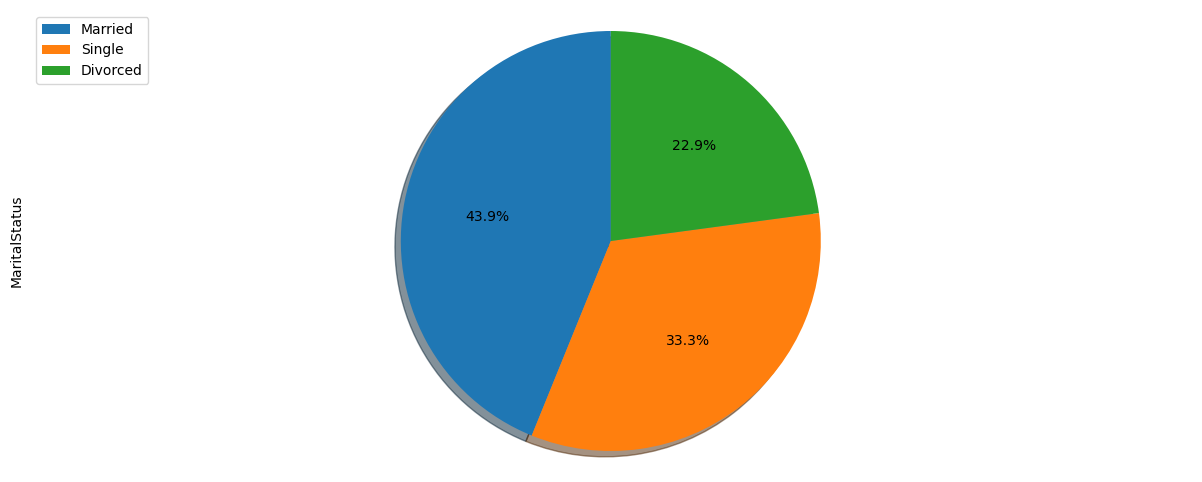

In [61]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left') 

In [62]:
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,219,402,258
1,23,62,94


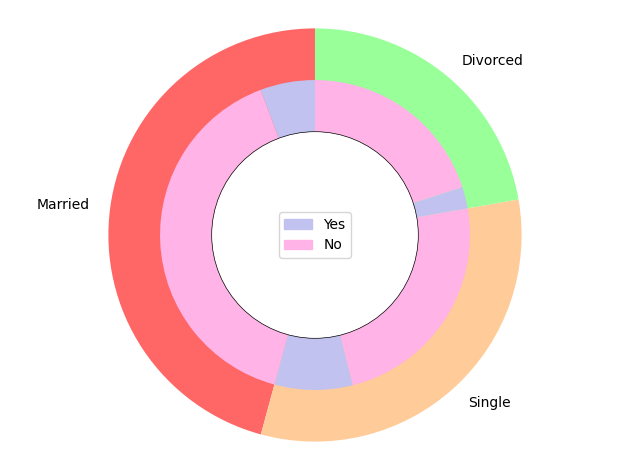

In [63]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()

fig6.gca().add_artist(centre_circle)

#legend

pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()